In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import cv2
import os
import PIL

In [2]:
data_dir='alzheimer_dataset'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('alzheimer_dataset')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('alzheimer_dataset/MildDemented/26 (19) - Copy.jpg'),
 WindowsPath('alzheimer_dataset/MildDemented/26 (19).jpg'),
 WindowsPath('alzheimer_dataset/MildDemented/26 (20) - Copy.jpg'),
 WindowsPath('alzheimer_dataset/MildDemented/26 (20).jpg'),
 WindowsPath('alzheimer_dataset/MildDemented/26 (21) - Copy.jpg')]

In [10]:
alzheimer_images_dict = {
    'MildDemented': list(data_dir.glob('MildDemented/*')),
    'ModerateDemented': list(data_dir.glob('ModerateDemented/*')),
    'VeryMildDemented': list(data_dir.glob('VeryMildDemented/*')),
    
    }

In [11]:
alzheimer_images_labels = {
    'MildDemented': 0,
    'ModerateDemented': 1,
    'VeryMildDemented': 2,
   
}

In [12]:
img = cv2.imread(str(alzheimer_images_dict['VeryMildDemented'][2]))

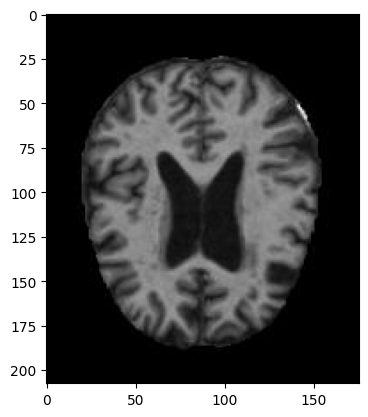

In [13]:
plt.imshow(img)

In [14]:
m = list(data_dir.glob('VeryMildDemented/*'))

In [ ]:
img.shape

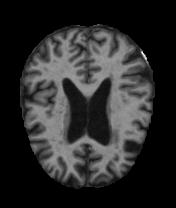

In [103]:
PIL.Image.open(str(m [2]))


In [105]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:


X, y = [], []

for brain_name, images in alzheimer_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(32,32))
#         resized_img= resized_img.reshape(1,32,32,3)
        X.append(resized_img)
        y.append(alzheimer_images_labels[brain_name])

In [16]:
len(X)
len(y)

4992

In [17]:
X = np.array(X)
y = np.array(y)

In [109]:
X[1].shape

(32, 32, 3)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, shuffle=True)

In [19]:
X_train_scaled = X_train/255
X_test_scaled = X_test / 255

In [112]:
len(X)

4992

In [20]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout,Flatten

In [21]:

model=Sequential()
#adding the first Convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
#adding Max pooling layer
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
#adding another Convolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2,2))
model.add(Flatten())
#adding dense layer
model.add(Dense(216,activation='relu'))
model.add(Dropout(0.2))
#adding output layer
model.add(Dense(3,activation='softmax'))

In [23]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [24]:
my_callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='./AlZHEIMER_model1'),]
model.fit(X_train_scaled, y_train, epochs=10)


Epoch 1/10
117/117 [==============================] - 11s 79ms/step - loss: 0.7620 - accuracy: 0.5406
Epoch 2/10
117/117 [==============================] - 10s 86ms/step - loss: 0.6954 - accuracy: 0.6335
Epoch 3/10
117/117 [==============================] - 13s 109ms/step - loss: 0.6263 - accuracy: 0.6862
Epoch 4/10
117/117 [==============================] - 10s 87ms/step - loss: 0.5155 - accuracy: 0.7786
Epoch 5/10
117/117 [==============================] - 8s 72ms/step - loss: 0.4042 - accuracy: 0.8336
Epoch 6/10
117/117 [==============================] - 12s 105ms/step - loss: 0.3257 - accuracy: 0.8691
Epoch 7/10
117/117 [==============================] - 16s 140ms/step - loss: 0.2743 - accuracy: 0.8948
Epoch 8/10
117/117 [==============================] - 12s 105ms/step - loss: 0.2404 - accuracy: 0.9065
Epoch 9/10
117/117 [==============================] - 12s 104ms/step - loss: 0.1946 - accuracy: 0.9215
Epoch 10/10
117/117 [==============================] - 11s 93ms/step - loss: 0

In [62]:
predictions =model.predict(X_test_scaled[:200])
predictions

7/7 [==============================] - 0s 17ms/step


array([[9.83133376e-01, 4.97381995e-03, 1.18928561e-02],
       [9.92257774e-01, 1.65859354e-03, 6.08354341e-03],
       [2.95173824e-02, 1.43277291e-02, 9.56154883e-01],
       [2.93270767e-01, 1.97742656e-01, 5.08986592e-01],
       [9.98806596e-01, 1.65914935e-05, 1.17684458e-03],
       [8.78391135e-03, 2.53770035e-03, 9.88678396e-01],
       [9.93386447e-01, 6.68394088e-04, 5.94515819e-03],
       [9.75347757e-01, 4.59255977e-03, 2.00596880e-02],
       [9.95879889e-01, 6.57871075e-04, 3.46234953e-03],
       [3.97524014e-02, 1.03520844e-02, 9.49895501e-01],
       [1.87968388e-02, 3.88576859e-03, 9.77317333e-01],
       [9.29194689e-01, 1.79329738e-02, 5.28723411e-02],
       [5.17744303e-01, 1.62191596e-02, 4.66036618e-01],
       [8.83871257e-01, 1.30643519e-02, 1.03064388e-01],
       [7.97300693e-03, 3.06911836e-03, 9.88957882e-01],
       [9.39774327e-03, 5.56133920e-03, 9.85040843e-01],
       [5.56253246e-04, 2.56795640e-04, 9.99186933e-01],
       [2.92982370e-01, 7.84353

In [118]:
for i in predictions:
    m=np.argmax(i)
    print(m , end=" ")

0 0 2 0 0 2 0 0 0 2 2 0 0 0 2 2 2 2 2 2 

In [25]:
model.evaluate(X_test_scaled,y_test)

39/39 [==============================] - 1s 25ms/step - loss: 0.1132 - accuracy: 0.9671


[0.11321466416120529, 0.9671474099159241]

In [41]:
rounded_predictions = model.predict(X_test_scaled, batch_size=128, verbose=0)

array([0.9922578 , 0.00165859, 0.00608354], dtype=float32)

In [63]:
rounded_labels=np.argmax(predictions, axis=1)

In [46]:
rounded_labels[1]

0

In [64]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test[:200], rounded_labels)

In [65]:
cf

array([[103,   0,   1],
       [  0,   2,   4],
       [  0,   0,  90]], dtype=int64)

<AxesSubplot: >

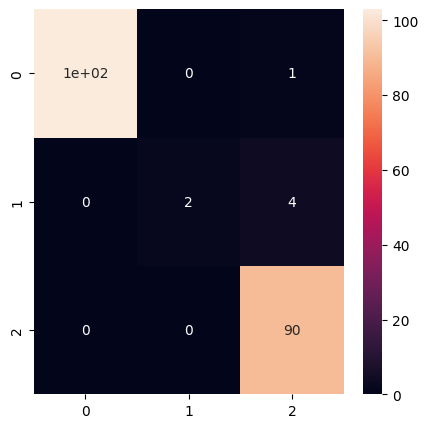

In [67]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index =[0,1,2] ,  columns = [0,1,2])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True)

In [120]:
y_test[:20]

array([0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [121]:
model.save('AlZHEIMER.h5')

In [122]:
model.save('AlZHEIMER')

INFO:tensorflow:Assets written to: AlZHEIMER\assets


INFO:tensorflow:Assets written to: AlZHEIMER\assets


In [57]:
img=cv2.resize(img,(32,32))


In [58]:
img = img.reshape(1,32,32,3)

In [59]:
pred=model.predict(img)

1/1 [==============================] - 0s 182ms/step


In [301]:
np.argmax(pred)

2

In [136]:
ann=Sequential([

    
    layers.Dense(800,input_shape=(X_train.shape[1],) ,activation="softmax"),
     layers.Dense(700, activation="softmax"),
    
     layers.Dense(600, activation="softmax"),
    layers.Dense(500, activation="softmax"),
    
     layers.Dense(400, activation="softmax"),

     layers.Dense(300, activation="softmax"),
    layers.Dense(3,activation="sigmoid")
])

ann.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [137]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),

    tf.keras.callbacks.TensorBoard(log_dir='./Tumorlogs1'),]

In [61]:
ann.evaluate(X_test_scaled,y_test)

7/7 [==============================] - 2s 189ms/step - loss: 0.8283 - accuracy: 0.9200


[0.8283018469810486, 0.9200000166893005]

In [62]:
predictions = ann.predict(X_test_scaled[:20])
predictions

1/1 [==============================] - 0s 321ms/step


array([[0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395],
       [0.5650354 , 0.43795368, 0.43714395]], dtype=float32)

In [64]:
for i in predictions:
    m=np.argmax(i)
    print(m , end=" ")
    

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [65]:
y_test[:20]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [107]:
new_model = tf.keras.models.load_model('Tumormodel3Ann.h5')

In [125]:
resized_img = cv2.resize(img,(180,180))

In [129]:
X1 = np.array(resized_img)

In [131]:
resized_img.shape

(180, 180, 3)

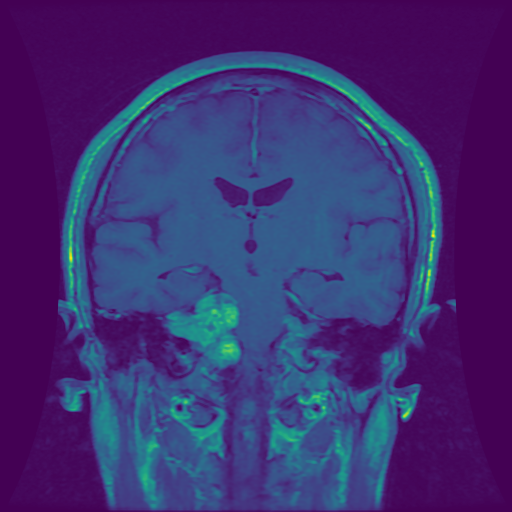

In [112]:
PIL.Image.open(str(m [0]))

In [38]:
ann.save('Tumormodel3Ann.h5')